In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
cereal_df=pd.read_csv('cereal.csv')
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [30]:
fields=['shelf','weight','cups','rating']
cereal_df_new=cereal_df.drop(fields,axis=1)
cereal_df_new.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [31]:
cereal_corr=cereal_df_new.corr()
cereal_corr


C:\Users\prodr\AppData\Local\Temp\ipykernel_2672\1585085115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cereal_corr=cereal_df_new.corr()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [32]:
ones_corr=np.ones_like(cereal_corr,dtype=bool)
ones_corr


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [33]:
mask=np.triu(ones_corr)

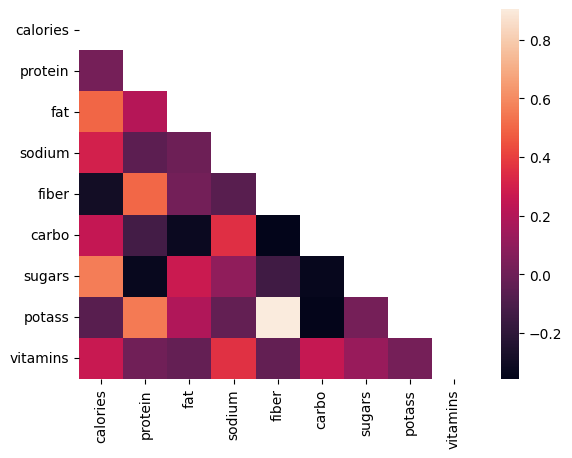

In [34]:
sns.heatmap(data=cereal_corr, mask=mask);

In [35]:
adjuisted_mask=mask[1:,:-1]
adjuisted_cereal_corr=cereal_corr.iloc[1:,:-1]

Text(0.0, 1.0, 'CORRELATION OF NUTRITION')

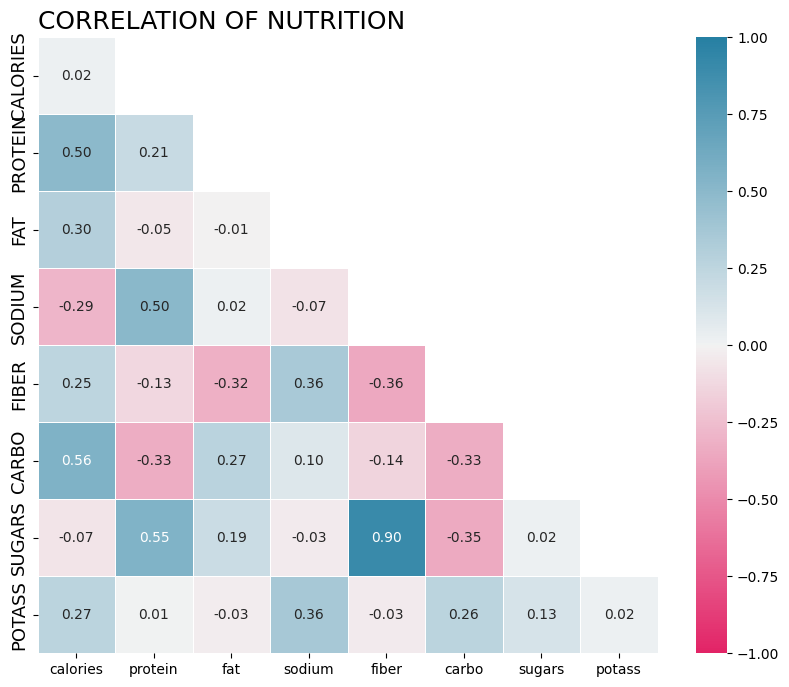

In [36]:

cmap = sns.diverging_palette(0,230,90.60,as_cmap=True)
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(data=adjuisted_cereal_corr,mask=adjuisted_mask,annot=True,fmt=".2f",cmap=cmap,vmin=-1,vmax=1,linecolor='white',linewidths=0.5);

yticks=[i.upper() for i in adjuisted_cereal_corr.index]
xticks=[i.upper() for i in adjuisted_cereal_corr.columns]

ax.set_yticklabels(yticks,rotation=0,fontsize=13);
ax.set_yticklabels(xticks,rotation=90,fontsize=13);

title='CORRELATION OF NUTRITION'
ax.set_title(title,loc='left',fontsize=18)